<a href="https://colab.research.google.com/github/raz0208/Occlusion-Pedestrian-Detection/blob/main/cityscapes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1:
- Install Libraries
- Read Dataset from kaggle

In [1]:
# Install required libraries

import numpy as np
import pandas as pd
from google.colab import files
import random
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Install Kaggle

!pip install kaggle

In [3]:
# Upload JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezaazariaghouieh","key":"64b7017da0efc0f9837d9dc7b0591927"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the data from kaggle
#!/bin/bash
!kaggle datasets download shuvoalok/cityscapes

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/cityscapes
License(s): other
100% 199M/199M [00:03<00:00, 58.7MB/s]
100% 199M/199M [00:03<00:00, 54.9MB/s]


In [10]:
# Extract the Zipfile
!unzip /content/cityscapes.zip

Archive:  /content/cityscapes.zip
replace train/img/train1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Step 2: Primary Visualization

**Image Visualization**

Showing image: train2483.png
Image Info: (96, 256, 3)



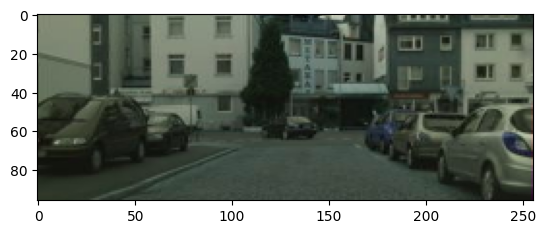

In [11]:
# Set the path to your image folder
img_folder = '/content/train/img'

# List all image files in the directory
img_files = [f for f in os.listdir(img_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if img_files is empty
if not img_files:
    print("No image files found in the specified folder.")
else:
    # Randomly choose an image file from the list
    random_img_file = random.choice(img_files)

    # Read and display the randomly chosen image
    img_path = os.path.join(img_folder, random_img_file)
    img = cv2.imread(img_path)
    print(f"Showing image: {random_img_file}")
    print(f"Image Info: {img.shape}\n")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

**Lable Visualization**

Showing image: train1602.png
Lable info: (96, 256, 3)



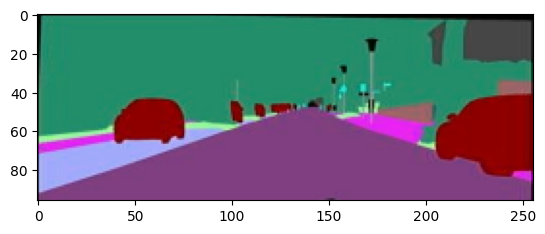

In [12]:
# Set the path to your image folder
label_folder = '/content/train/label'

# List all image files in the directory
label_files = [f for f in os.listdir(label_folder) if f.endswith('.png') or f.endswith('.jpg')]

# Check if label_files is empty
if not label_files:
    print("No image files found in the specified folder.")
else:
    # Randomly choose an image file from the list
    random_label_file = random.choice(label_files)

    # Read and display the randomly chosen image
    label_path = os.path.join(label_folder, random_label_file)
    img = cv2.imread(label_path)
    print(f"Showing image: {random_label_file}")
    print(f"Lable info: {img.shape}\n")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

**Visualize both Original and lable together of Training set**

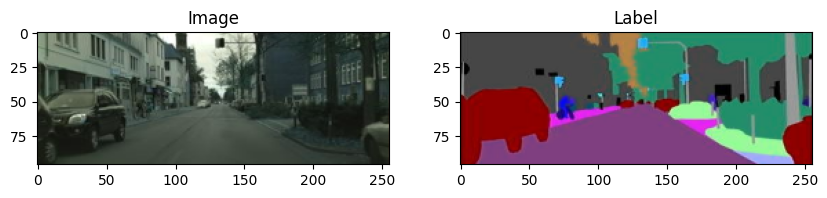

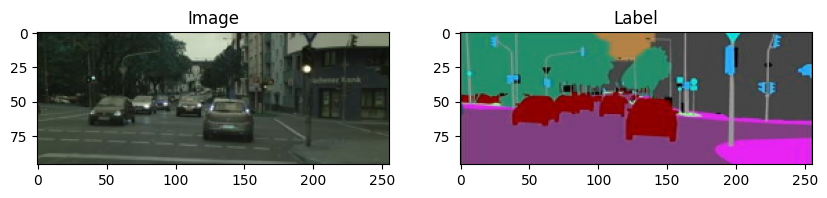

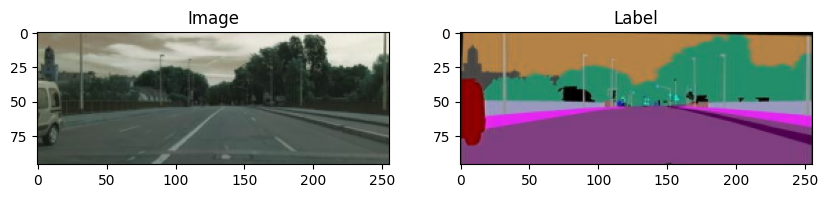

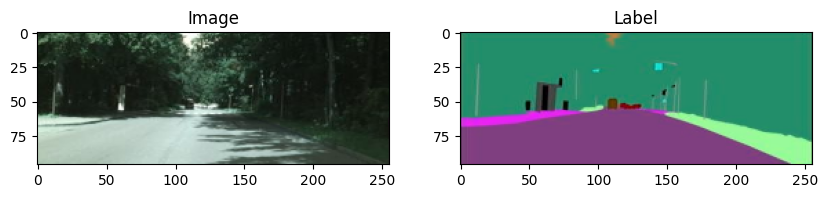

In [13]:
# Directories for images and labels
img_dir = "/content/train/img"
label_dir = "/content/train/label"

# Fetch all image paths
img_paths = [entry.path for entry in os.scandir(img_dir) if entry.is_file()]
label_paths = [entry.path for entry in os.scandir(label_dir) if entry.is_file()]

# Ensure both directories have the same number of files
num_images = min(len(img_paths), len(label_paths))

# Randomly select 4 image-label pairs
selected_indices = random.sample(range(num_images), 4)
selected_img_paths = [img_paths[i] for i in selected_indices]
selected_label_paths = [label_paths[i] for i in selected_indices]

# Display the images and labels
for img_path, label_path in zip(selected_img_paths, selected_label_paths):
    img = cv2.imread(img_path)
    label = cv2.imread(label_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    axes[1].imshow(cv2.cvtColor(label, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image")
    axes[1].set_title("Label")
    plt.show()

**Visualize both Original and lable together of Validation set**

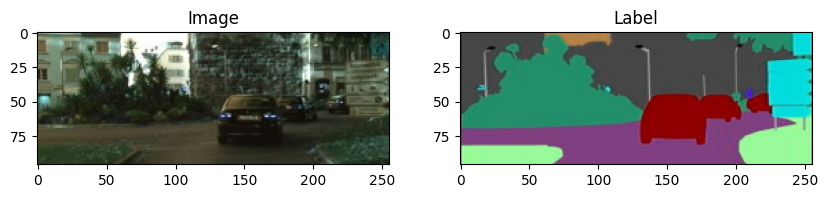

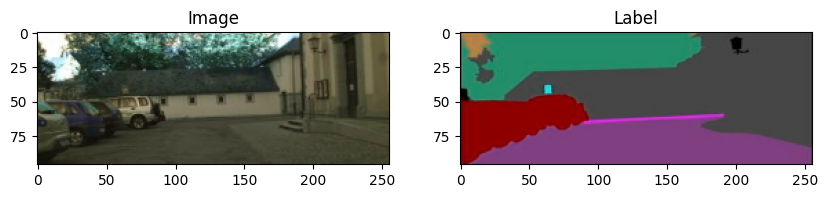

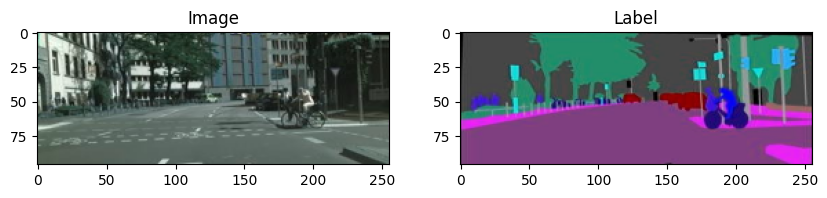

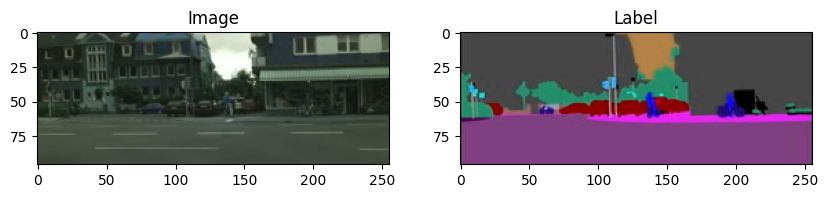

In [14]:
# Directories for images and labels
v_img_dir = "/content/val/img"
v_label_dir = "/content/val/label"

# Fetch all image paths
v_img_paths = [entry.path for entry in os.scandir(v_img_dir) if entry.is_file()]
v_label_paths = [entry.path for entry in os.scandir(v_label_dir) if entry.is_file()]

# Ensure both directories have the same number of files
num_vimages = min(len(v_img_paths), len(v_label_paths))

# Randomly select 4 image-label pairs
selected_indices = random.sample(range(num_vimages), 4)
selected_vimg_paths = [v_img_paths[i] for i in selected_indices]
selected_vlabel_paths = [v_label_paths[i] for i in selected_indices]

# Display the images and labels
for img_path, label_path in zip(selected_vimg_paths, selected_vlabel_paths):
    vimg = cv2.imread(img_path)
    vlabel = cv2.imread(label_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(vimg, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
    axes[1].imshow(cv2.cvtColor(vlabel, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image")
    axes[1].set_title("Label")
    plt.show()